# LEAD SCORING CASE STUDY

Problem Statement:
<br>An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# 1 Importing Libraries and Data File

In [264]:
import warnings, numpy as np, pandas as pd
warnings.filterwarnings('ignore')

In [265]:
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [266]:
#importing data file
lead_data = pd.read_csv('Leads.csv')

In [267]:
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [268]:
#Size of the data check
lead_data.shape

(9240, 37)

In [269]:
#Statistical aspects of the data
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [270]:
#Datatypes present in the data
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Data shows there are null values present. We'll take care of them during Data Cleaning

In [271]:
#Unique values present in the data
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

#### Most of the columns have no unique values, so, let's see whether we can proceed with logistic regression modelling

# 2. Cleaning the Data before proceeding to EDA

Looking at the data we have some columns like Specialization, Lead Profile, City etc with values as 'Select' where we dont have the info, there are as good as null, so replacing them with Nulls

In [272]:
#Replacing 'select' values with Null

lead_data = lead_data.replace('Select',np.nan)
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No             NaN     NaN   
1                        No             NaN     NaN   
2                        No  Potential Lead  Mumbai   
3                        No             NaN  Mumbai   
4                        No             NaN  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [273]:
# Dropping unique Ids as not required for the modelling

lead_data.drop(['Prospect ID'], axis = 1, inplace = True)
lead_data.drop(['Lead Number'], axis = 1, inplace = True)

In [274]:
#Checking percentage of nulls in columns

lead_data.isnull().sum()/len(lead_data)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

#### Output shows there are null values present in the dataset. Drop columns having more than 50% null values

In [275]:
#Dropping columns with missing data
lead_data.drop(['How did you hear about X Education'], axis = 1, inplace = True)
lead_data.drop(['Lead Profile'], axis= 1, inplace = True)
lead_data.drop(['Lead Quality'], axis = 1, inplace = True)


In [276]:
# Dropping Asymmetrique Scores as we have Asymmetrique Index to give us the same info

lead_data.drop(['Asymmetrique Activity Score'], axis = 1, inplace = True)
lead_data.drop(['Asymmetrique Profile Score'], axis = 1, inplace = True)

In [277]:
#Dropping City and country variables as it is of no use in our analysis.
lead_data.drop(['City'],axis = 1, inplace = True)
lead_data.drop(['Country'],axis = 1, inplace = True)

In [278]:
#Re-checking percentage of nulls in columns after initial cleanup

lead_data.isnull().sum()/len(lead_data)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [279]:
#Checking the spread of numerical columns

lead_data.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9103.000000                  9240.000000   
mean      0.385390     3.445238                   487.698268   
std       0.486714     4.854853                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

After creaking dummy variables and checking for correlations we have to drop more variables depending on their values

# 3. Performing Analysis on the Data

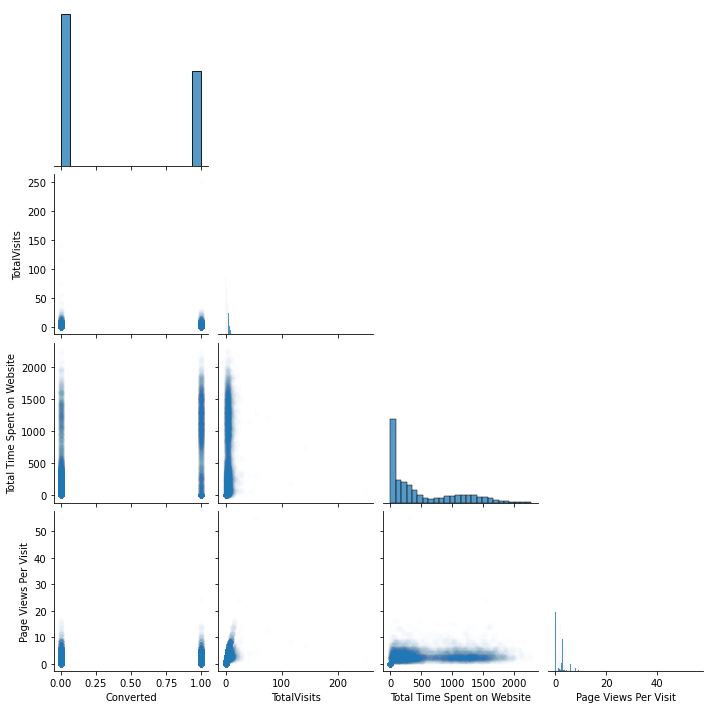

In [280]:
# Pair Plot for numerical variables

vars=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Setting alpha to 0.01 to see dense clusters
sns.pairplot(lead_data[vars], plot_kws={'alpha':0.01}, corner=True)
plt.show()

Numerical Inferences:
<br>Total Visits : Converted customers have a fewer number of visits compared to non-converted customers between 0-50 visits. High visiting customers also seem to be less likely to convert.
<br>Total Time Spent on Website : Converted customers are likely to spend between 1000 to 1500 minutes on the website. This means converted customers have an higher average time spend per session on the website. Non-converted customers only spend between 0-500 minutes.
<br>Page Views Per Visit : Both converted and non-converted customers have the same number of website visits.

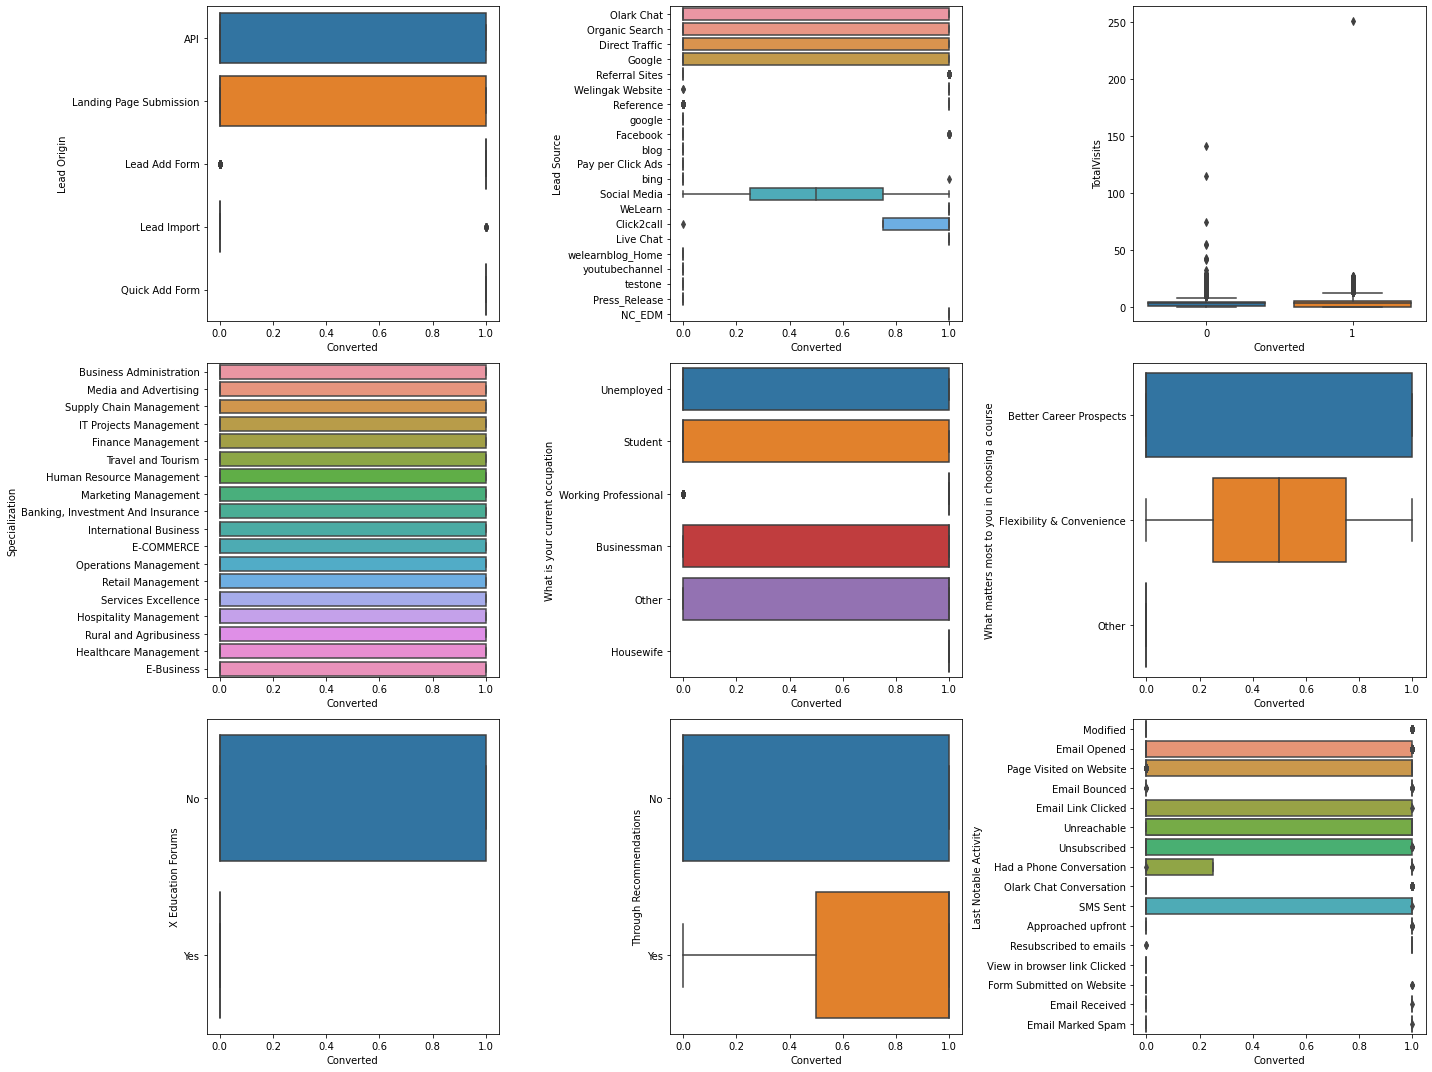

In [281]:
# Box Plots for categorical variables
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x='Converted',y='Lead Origin',data=lead_data)
plt.subplot(3,3,2)
sns.boxplot(x='Converted',y='Lead Source',data=lead_data)
plt.subplot(3,3,3)
sns.boxplot(x='Converted',y='TotalVisits',data=lead_data)
plt.subplot(3,3,4)
sns.boxplot(x='Converted',y='Specialization',data=lead_data)
plt.subplot(3,3,5)
sns.boxplot(x='Converted',y='What is your current occupation',data=lead_data)
plt.subplot(3,3,6)
sns.boxplot(x='Converted',y='What matters most to you in choosing a course',data=lead_data)
plt.subplot(3,3,7)
sns.boxplot(x='Converted',y='X Education Forums',data=lead_data)
plt.subplot(3,3,8)
sns.boxplot(x='Converted',y='Through Recommendations',data=lead_data)
plt.subplot(3,3,9)
sns.boxplot(x='Converted',y='Tags',data=lead_data)
plt.subplot(3,3,9)
sns.boxplot(x='Converted',y='Last Notable Activity',data=lead_data)
plt.tight_layout()
plt.show()

Categorical Inferences:
<br>Lead Origin : Leads originated through 'add forms ' are more likely to convert.

<br>Lead Source : Leads generated from welingak website, Reference and NC_EDM are likely to convert. Leads from press release and other social media are less likely to convert.

<br>What is your current occupation : Housewives and working professionals have the best likelihood to convert. No inferences can be made about other professions.

<br>Through Recommendations : Leads who visit via recommendations are more likely to convert.

# 4. Preparing the data for Model Building

## Converting Yes/No to 0/1

In [282]:
# List of variables to map
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining a map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variables
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [283]:
lead_data[varlist].head()

Do Not Email  Do Not Call  Search  Magazine  Newspaper Article  \
0             0            0       0         0                  0   
1             0            0       0         0                  0   
2             0            0       0         0                  0   
3             0            0       0         0                  0   
4             0            0       0         0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  
0                                       0  
1                                       0  
2                                       1  
3                                       0  
4                                       0

## Creating dummies

In [284]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity',
                             'Specialization','What is your current occupation',
                             'What matters most to you in choosing a course','Tags',
                             'Asymmetrique Activity Index','Asymmetrique Profile Index',
                             'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)
lead_data.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  ...  \
0  Page Visited on Website                      NaN  ...   
1             Email Opened                      NaN  ...   
2             Email Opened  Business Administration  ...   
3              Unreachable    Media and Advertising  ...   
4        Converted to Lead                      NaN  ...   

  Last Notable Activity_Form Submitted on Website  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                         

In [285]:
# Dropping Original columns for which dummies were created

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity'], 1)

In [286]:
lead_data.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  Magazine  \
0                            0                   0.0       0         0   
1                          674                   2.5       0         0   
2                         1532                   2.0       0         0   
3                          305                   1.0       0         0   
4                         1428                   1.0       0         0   

   Newspaper Article  X Education Forums  ...  \
0                  0                   0  ...   
1                  0                   0  ...   
2                  0                   0  ...   
3                  0                   0  ...   
4                  0                   0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

[5 rows x 126 columns]

In [287]:
pd.set_option('display.max_rows', None)

In [288]:
#Re-checking for null values
lead_data.isnull().sum()/len(lead_data.index)*100

Do Not Email                                                               0.000000
Do Not Call                                                                0.000000
Converted                                                                  0.000000
TotalVisits                                                                1.482684
Total Time Spent on Website                                                0.000000
Page Views Per Visit                                                       1.482684
Search                                                                     0.000000
Magazine                                                                   0.000000
Newspaper Article                                                          0.000000
X Education Forums                                                         0.000000
Newspaper                                                                  0.000000
Digital Advertisement                                                      0

In [289]:
# Removing rows where TotalVisits and Page Views Per Visit have null values, this wont have any impact

lead_data = lead_data[~np.isnan(lead_data['TotalVisits'])]
lead_data = lead_data[~np.isnan(lead_data['Page Views Per Visit'])]

In [290]:
lead_data.isnull().sum()/len(lead_data.index)*100

Do Not Email                                                               0.0
Do Not Call                                                                0.0
Converted                                                                  0.0
TotalVisits                                                                0.0
Total Time Spent on Website                                                0.0
Page Views Per Visit                                                       0.0
Search                                                                     0.0
Magazine                                                                   0.0
Newspaper Article                                                          0.0
X Education Forums                                                         0.0
Newspaper                                                                  0.0
Digital Advertisement                                                      0.0
Through Recommendations                             

We have now converted all dummy variables for all categorical variables in the data. We can now proceed with model building.

# 5. Splitting the data into Train-Test datasets

In [291]:
# Putting feature variable to X

X = lead_data.drop(['Converted'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Magazine  Newspaper Article  \
0                   0.0       0         0                  0   
1                   2.5       0         0                  0   
2                   2.0       0         0                  0   
3                   1.0       0         0                  0   
4                   1.0       0         0                  0   

   X Education Forums  Newspaper  ...  \
0                   0          0  ...   
1                   0          0  ...   
2                   0          0  ...   
3                   0          0  ...   
4                   0          0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

[5 rows x 125 columns]

In [292]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [293]:
# Train - Test Split:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# 6. Feature Scaling

There are few columns with larger values compared to others. To get better model, we have to scale the values in these columns.

In [294]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
7962             0            0    -0.092900                     1.476324   
5520             0            0     0.695064                    -0.771066   
1962             0            0     0.301082                    -0.571257   
1566             0            0     2.074000                     1.393834   
9170             0            0    -0.683873                    -0.881052   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
7962             -0.394072       0         0                  0   
5520              2.111481       0         0                  0   
1962              0.061483       0         0                  0   
1566              0.517039       0         0                  0   
9170             -1.077404       0         0                  0   

      X Education Forums  Newspaper  ...  \
7962                   0          0  ...   
5520                   0          0  ...   
1962                   0          0  ...   
1566                   0          0  ...   
9170                   0          0  ...   

      Last Notable Activity_Form Submitted on Website  \
7962                                                0   
5520                                                0   
1962                                                0   
1566                                                0   
9170                                                0   

      Last Notable Activity_Had a Phone Conversation  \
7962                                               0   
5520                                               0   
1962                                               0   
1566                                               0   
9170                                               0   

      Last Notable Activity_Modified  \
7962                               0   
5520                               0   
1962                               1   
1566                               0   
9170                               0   

      Last Notable Activity_Olark Chat Conversation  \
7962                                              0   
5520                                              0   
1962                                              0   
1566                                              0   
9170                                              0   

      Last Notable Activity_Page Visited on Website  \
7962                                              0   
5520                                              0   
1962                                              0   
1566                                              0   
9170                                              0   

      Last Notable Activity_Resubscribed to emails  \
7962                                             0   
5520                                             0   
1962                                             0   
1566                                             0   
9170                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
7962                               1                                  0   
5520                               0                                  0   
1962                               0                                  0   
1566                               0                                  0   
9170                               0                                  0   

      Last Notable Activity_Unsubscribed  \
7962                                   0   
5520                                   0   
1962                                   0   
1566                                   0   
9170                                   0   

      Last Notable Activity_View in browser link Clicked  
7962                                                  0   
5520                                                  0   
1962                                                  0   
1566           

In [295]:
# Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

38.02043282434362

#### As the score shows initially without the model building we have conversion rate of X education is around 38%.
#### Now we have to build the model to get this score to more than 80%.

## Looking for correlations

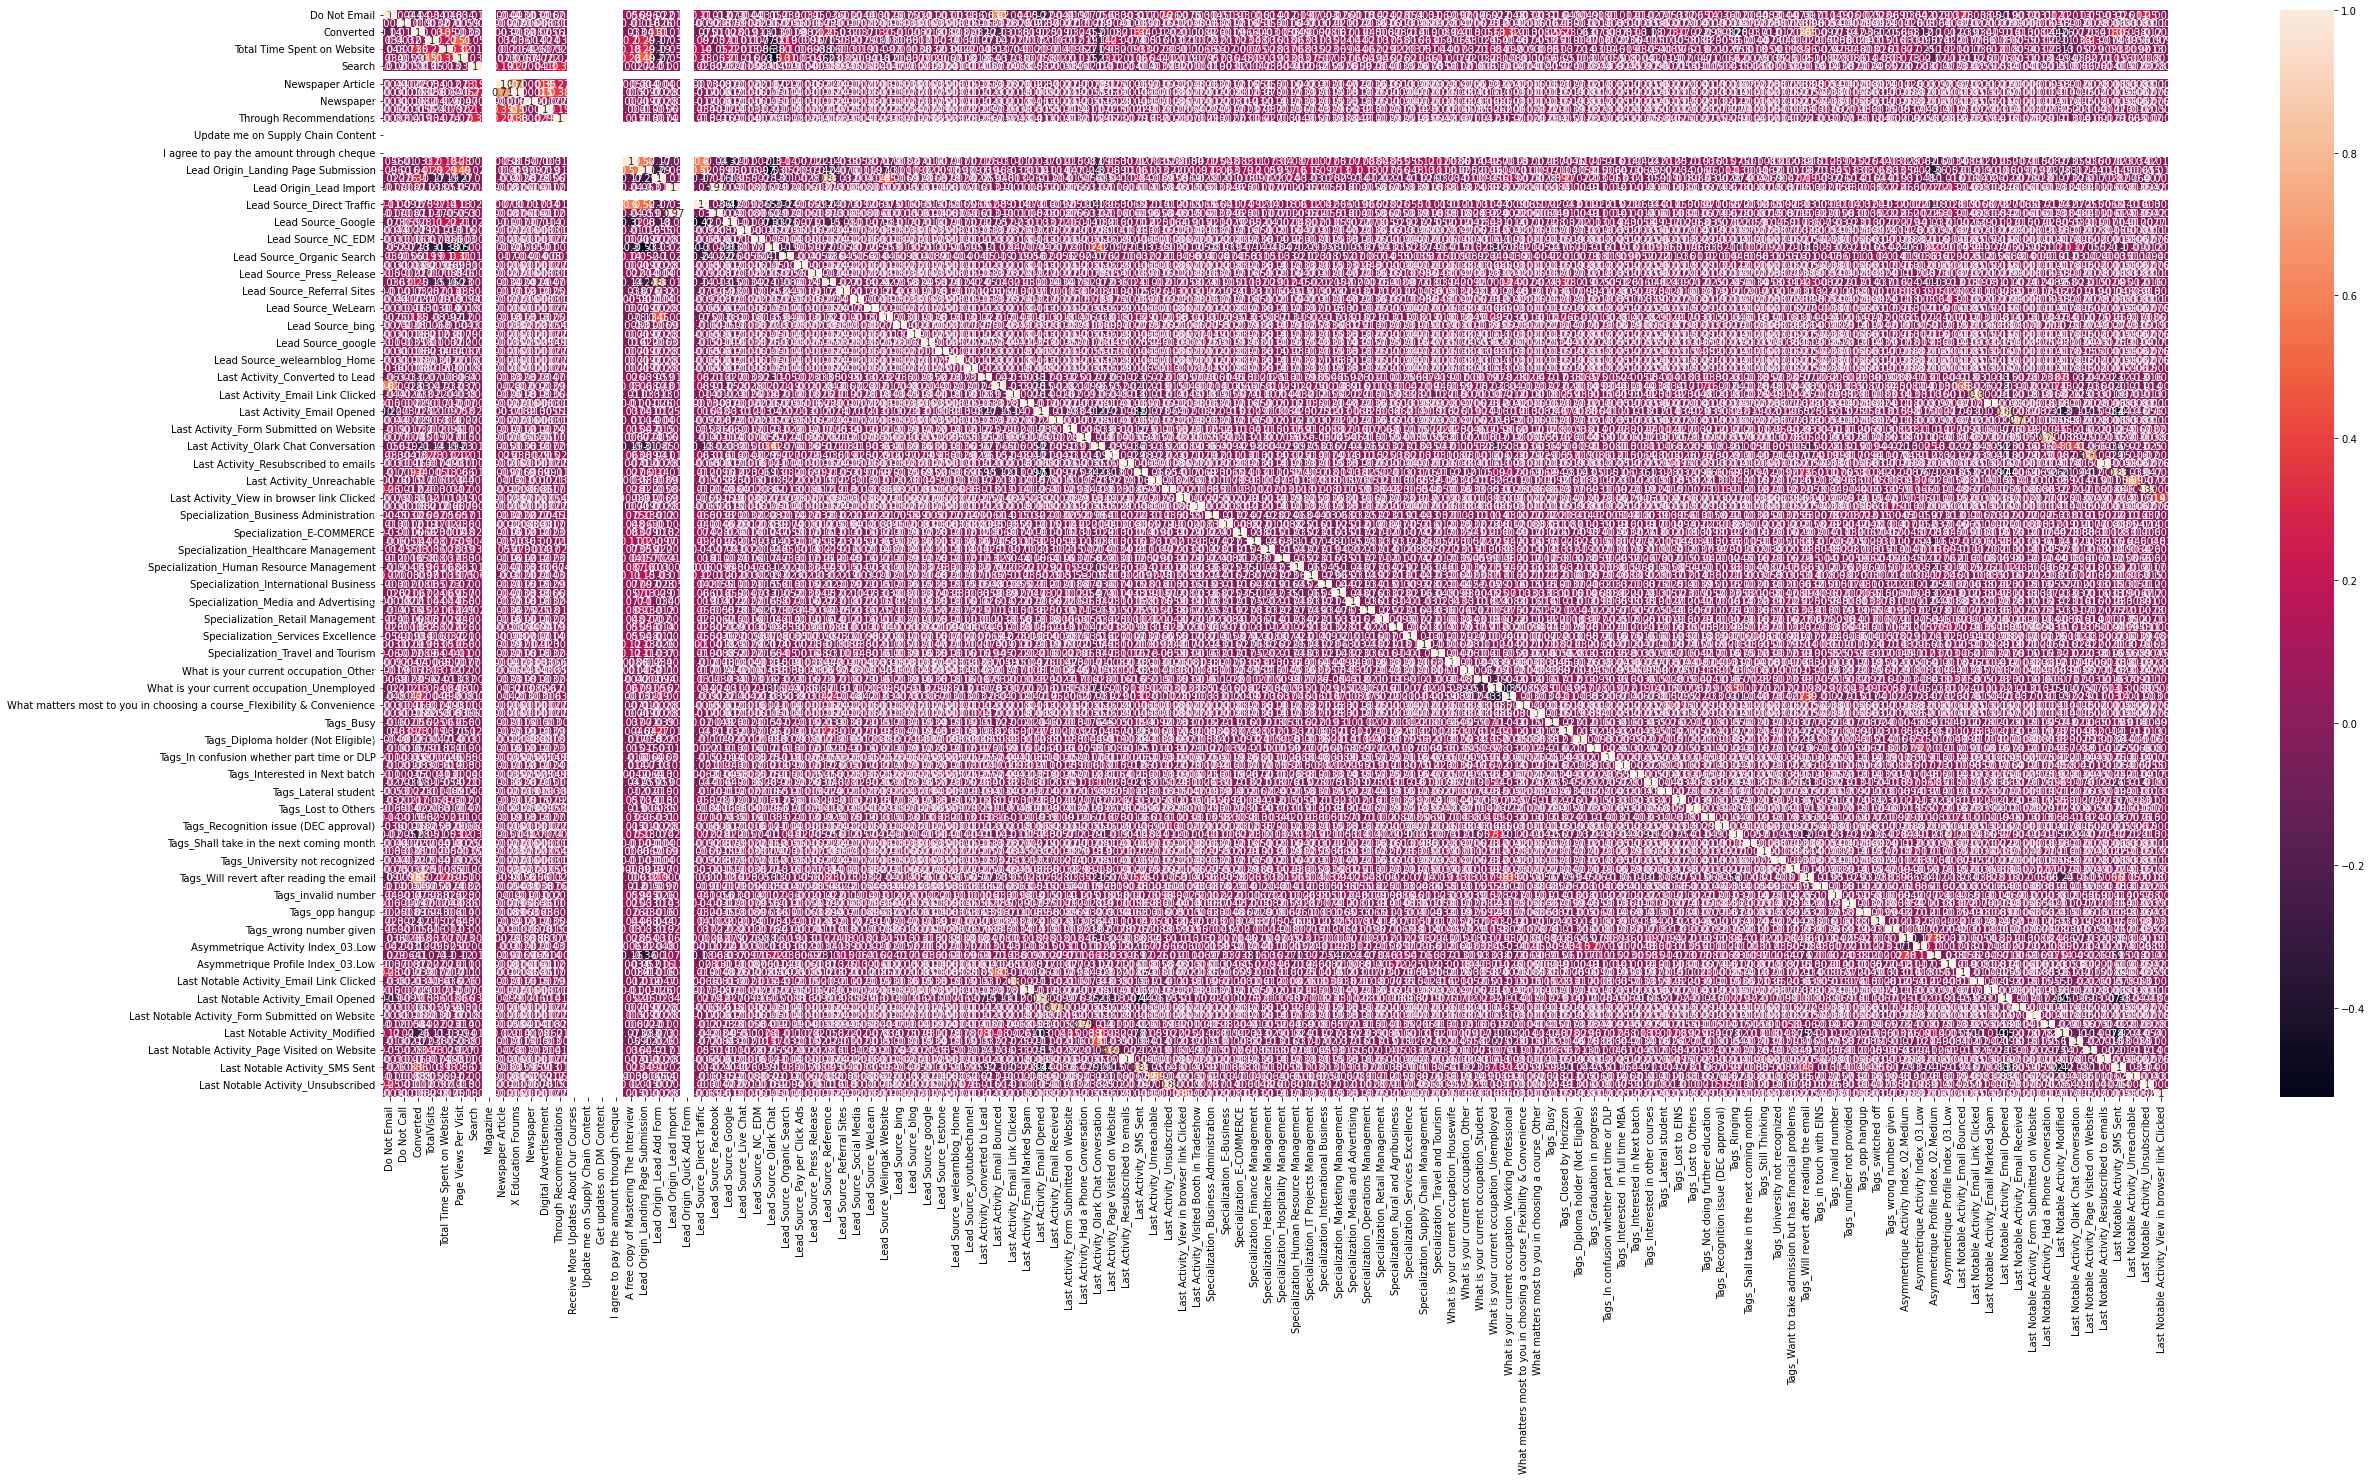

In [296]:
plt.figure(figsize = (40,20))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

#### Plot shows there are a few columns which have correlations. These columns can be dropped during the model building 

# 7. Model Building

In [297]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6257
Model Family:                Binomial   Df Model:                          114
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 03 Jan 2023   Deviance:                       56736.
Time:                        15:05:44   Pearson chi2:                 2.77e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    9.181e+15   8.08e+07   1.14e+08      0.000    9.18e+15    9.18e+15
Do Not Email                                                            -3.701e+14   4.45e+06  -8.31e+07      0.000    -3.7e+14    -3.7e+14
Do Not Call                                                              5.971e+15   4.77e+07   1.25e+08      0.000    5.97e+15    5.97e+15
TotalVisits                                                              5.184e+13   1.02e+06    5.1e+07      0.000    5.18e+13    5.18e+13
Total Time Spent on Website                                              3.375e+14   1.03e+06   3.27e+08      0.000    3.38e+14    3.38e+14
Page Views Per Visit                                                    -2.207e+13   1.22e+06  -1.82e+07      0.000   -2.21e+13   -2.21e+13
Search                                                                   6.642e+14   2.23e+07   2.98e+07      0.000    6.64e+14    6.64e+14
Magazine                                                                  -63.4889   9.75e-07  -6.51e+07      0.000     -63.489     -63.489
Newspaper Article                                                       -1.852e+15   4.25e+07  -4.36e+07      0.000   -1.85e+15   -1.85e+15
X Education Forums                                                      -1.852e+15   4.25e+07  -4.36e+07      0.000   -1.85e+15   -1.85e+15
Newspaper                                                               -3.516e+15   6.73e+07  -5.22e+07      0.000   -3.52e+15   -3.52e+15
Digital Advertisement                                                    1.636e+14   3.92e+07   4.17e+06      0.000    1.64e+14    1.64e+14
Through Recommendations                                                   8.67e+14   3.16e+07   2.75e+07      0.000    8.67e+14    8.67e+14
Receive More Updates About Our Courses                                     20.6853   5.98e-07   3.46e+07      0.000      20.685      20.685
Update me on Supply Chain Content                                        -182.9820   1.76e-06  -1.04e+08      0.000    -182.982    -182.982
Get updates on DM Content                                                 -51.4058   6.18e-07  -8.32e+07      0.000     -51.406     -51.406
I agree to pay the amount through cheque                                  -17.8346   5.38e-07  -3.31e+07      0.000     -17.835     -17.835
A free copy of Mastering The Interview                                   -2.59e+13   2.67e+06   -9.7e+06      0.000   -2.59e+13   -2.59e+13
Lead Origin_Landing Page Submission                                       -6.1e+13   3.32e+06  -1.84e+07      0.000    -6.1e+13    -6.1e+13
Lea

#### As the values are categorical and not linear, we use logistic regression for model building

# 8. Feature Selection using RFE

In [298]:
# importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [299]:
# Creating a RFE object with 15 variables as output

logreg = LogisticRegression()

rfe = RFE(logreg, 15)      
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
        True, False,  True,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [300]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('Do Not Call', False, 75),
 ('TotalVisits', False, 69),
 ('Total Time Spent on Website', False, 10),
 ('Page Views Per Visit', False, 91),
 ('Search', False, 29),
 ('Magazine', False, 108),
 ('Newspaper Article', False, 83),
 ('X Education Forums', False, 84),
 ('Newspaper', False, 85),
 ('Digital Advertisement', False, 50),
 ('Through Recommendations', False, 103),
 ('Receive More Updates About Our Courses', False, 105),
 ('Update me on Supply Chain Content', False, 104),
 ('Get updates on DM Content', False, 109),
 ('I agree to pay the amount through cheque', False, 110),
 ('A free copy of Mastering The Interview', False, 76),
 ('Lead Origin_Landing Page Submission', False, 31),
 ('Lead Origin_Lead Add Form', False, 9),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Origin_Quick Add Form', False, 111),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 57),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Live Chat', False,

In [301]:
# Storing variables with significant weights in a variable

col = X_train.columns[rfe.support_]

In [302]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=110)

# Assessing the model with StatModels

We keep building the model until the p value is less than 5%

## Model 2: Using feature Selection by RFE

In [303]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1576.0
Date:                Tue, 03 Jan 2023   Deviance:                       3152.1
Time:                        15:05:49   Pearson chi2:                 8.35e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9752      0.066    -30.138      0.000      -2.104      -1.847
Lead Source_Welingak Website                 4.6137      0.729      6.328      0.000       3.185       6.043
Last Activity_SMS Sent                       2.1959      0.099     22.246      0.000       2.002       2.389
Tags_Closed by Horizzon                      6.5825      0.714      9.216      0.000       5.183       7.982
Tags_Diploma holder (Not Eligible)          -1.8337      1.038     -1.766      0.077      -3.868       0.201
Tags_Interested  in full time MBA           -1.6763      0.607     -2.764      0.006      -2.865      -0.488
Tags_Interested in other courses            -2.0574      0.347     -5.923      0.000      -2.738      -1.377
Tags_Lost to EINS                            6.2581      0.732      8.550      0.000       4.824       7.693
Tags_Not doing further education            -3.0214      1.014     -2.981      0.003      -5.008      -1.035
Tags_Ringing                                -2.9259      0.229    -12.791      0.000      -3.374      -2.478
Tags_Will revert after reading the email     4.8533      0.172     28.288      0.000       4.517       5.190
Tags_invalid number                         -3.3506      1.020     -3.286      0.001      -5.349      -1.352
Tags_number not provided                   -23.5361   2.58e+04     -0.001      0.999   -5.06e+04    5.05e+04
Tags_switched off                           -3.3784      0.592     -5.711      0.000      -4.538      -2.219
Tags_wrong number given                    -23.9429   2.09e+04     -0.001      0.999   -4.11e+04     4.1e+04
Asymmetrique Activity Index_03.Low          -1.9378      0.405     -4.781      0.000      -2.732      -1.143
============================================================================================================
"""

In [304]:
# Make a VIF dataframe for all the variables present
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train_sm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13        Asymmetrique Activity Index_03.Low  1.05
0               Lead Source_Welingak Website  1.03
3         Tags_Diploma holder (Not Eligible)  1.03
11                         Tags_switched off  1.02
2                    Tags_Closed by Horizzon  1.01
12                   Tags_wrong number given  1.01
4          Tags_Interested  in full time MBA  1.00
6                          Tags_Lost to EINS  1.00
7           Tags_Not doing further education  1.00
10                       Tags_invalid number  1.00
5           Tags_Interested in other courses  0.33
9   Tags_Will revert after reading the email  0.11
1                     Last Activity_SMS Sent  0.09
8                               Tags_Ringing  0.07

VIF values are all below 5

In [305]:
# Dropping the most insignificant values ('Tags_number not provided') and constant

X_train_sm2=X_train_sm.drop(['const','Tags_number not provided'],1)

## Model 3:

In [306]:
X_train_sm3 = sm.add_constant(X_train_sm2)
logm2 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1582.5
Date:                Tue, 03 Jan 2023   Deviance:                       3165.0
Time:                        15:05:49   Pearson chi2:                 8.33e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9826      0.066    -30.259      0.000      -2.111      -1.854
Lead Source_Welingak Website                 4.6243      0.729      6.343      0.000       3.195       6.053
Last Activity_SMS Sent                       2.1830      0.098     22.191      0.000       1.990       2.376
Tags_Closed by Horizzon                      6.5900      0.714      9.227      0.000       5.190       7.990
Tags_Diploma holder (Not Eligible)          -1.8220      1.038     -1.756      0.079      -3.856       0.212
Tags_Interested  in full time MBA           -1.6646      0.606     -2.746      0.006      -2.853      -0.476
Tags_Interested in other courses            -2.0460      0.347     -5.892      0.000      -2.727      -1.365
Tags_Lost to EINS                            6.2660      0.732      8.561      0.000       4.832       7.701
Tags_Not doing further education            -3.0097      1.013     -2.970      0.003      -4.996      -1.023
Tags_Ringing                                -2.9079      0.229    -12.721      0.000      -3.356      -2.460
Tags_Will revert after reading the email     4.8623      0.172     28.348      0.000       4.526       5.198
Tags_invalid number                         -3.3330      1.020     -3.269      0.001      -5.331      -1.335
Tags_switched off                           -3.3601      0.591     -5.681      0.000      -4.519      -2.201
Tags_wrong number given                    -22.9247   1.27e+04     -0.002      0.999   -2.49e+04    2.49e+04
Asymmetrique Activity Index_03.Low          -1.9390      0.405     -4.790      0.000      -2.732      -1.146
============================================================================================================
"""

In [307]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_sm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm3.values, i) for i in range(X_train_sm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                      const  2.58
10  Tags_Will revert after reading the email  1.25
2                     Last Activity_SMS Sent  1.13
9                               Tags_Ringing  1.13
6           Tags_Interested in other courses  1.07
3                    Tags_Closed by Horizzon  1.05
14        Asymmetrique Activity Index_03.Low  1.04
1               Lead Source_Welingak Website  1.03
4         Tags_Diploma holder (Not Eligible)  1.03
12                         Tags_switched off  1.03
5          Tags_Interested  in full time MBA  1.02
7                          Tags_Lost to EINS  1.02
8           Tags_Not doing further education  1.02
11                       Tags_invalid number  1.01
13                   Tags_wrong number given  1.01

VIF values are all below 5 and there is no need to eliminate variables based on the VIF values

In [308]:
# Dropping the most insignificant values ('Tags_wrong number given') and constant

X_train_sm4=X_train_sm3.drop(['const','Tags_wrong number given'],1)

## Model 4:

In [309]:
X_train_sm5 = sm.add_constant(X_train_sm4)
logm2 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1596.4
Date:                Tue, 03 Jan 2023   Deviance:                       3192.8
Time:                        15:05:49   Pearson chi2:                 8.25e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9927      0.066    -30.418      0.000      -2.121      -1.864
Lead Source_Welingak Website                 4.6443      0.729      6.374      0.000       3.216       6.073
Last Activity_SMS Sent                       2.1439      0.098     21.971      0.000       1.953       2.335
Tags_Closed by Horizzon                      6.6008      0.714      9.242      0.000       5.201       8.001
Tags_Diploma holder (Not Eligible)          -1.7983      1.037     -1.735      0.083      -3.830       0.233
Tags_Interested  in full time MBA           -1.6415      0.605     -2.712      0.007      -2.828      -0.455
Tags_Interested in other courses            -2.0241      0.347     -5.835      0.000      -2.704      -1.344
Tags_Lost to EINS                            6.2803      0.732      8.579      0.000       4.845       7.715
Tags_Not doing further education            -2.9869      1.013     -2.948      0.003      -4.972      -1.001
Tags_Ringing                                -2.8657      0.228    -12.558      0.000      -3.313      -2.418
Tags_Will revert after reading the email     4.8777      0.171     28.454      0.000       4.542       5.214
Tags_invalid number                         -3.2922      1.019     -3.230      0.001      -5.290      -1.295
Tags_switched off                           -3.3170      0.591     -5.610      0.000      -4.476      -2.158
Asymmetrique Activity Index_03.Low          -1.9515      0.403     -4.841      0.000      -2.742      -1.161
============================================================================================================
"""

Now the p value is less than 0.05 for all the variables. So let's check their VIF values also to finalize or to edit the model.

In [310]:
# Make a VIF dataframe for all the variables present


vif = pd.DataFrame()
vif['Features'] = X_train_sm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm4.values, i) for i in range(X_train_sm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12        Asymmetrique Activity Index_03.Low  1.05
0               Lead Source_Welingak Website  1.03
3         Tags_Diploma holder (Not Eligible)  1.03
11                         Tags_switched off  1.02
2                    Tags_Closed by Horizzon  1.01
4          Tags_Interested  in full time MBA  1.00
6                          Tags_Lost to EINS  1.00
7           Tags_Not doing further education  1.00
10                       Tags_invalid number  1.00
5           Tags_Interested in other courses  0.33
9   Tags_Will revert after reading the email  0.11
1                     Last Activity_SMS Sent  0.09
8                               Tags_Ringing  0.07

Scores show that VIF values for all the variables is less than 5. So we can start to make predictions based on this model.

# 9. Making Predictions on the Train Data

In [311]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm5)
y_train_pred[:10]

7962    0.537743
5520    0.119976
1962    0.040476
1566    0.947103
9170    0.119976
5097    0.119976
8954    0.062128
309     0.947103
5519    0.537743
1050    0.947103
dtype: float64

In [312]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.53774295, 0.11997557, 0.04047642, 0.94710252, 0.11997557,
       0.11997557, 0.06212777, 0.94710252, 0.53774295, 0.94710252])

In [313]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Converted_Prob
0          0        0.537743
1          0        0.119976
2          0        0.040476
3          1        0.947103
4          0        0.119976

In [314]:
# Selecting a threhold of 0.5 to make predictions
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  predicted
0          0        0.537743          1
1          0        0.119976          0
2          0        0.040476          0
3          1        0.947103          1
4          0        0.119976          0

# 10. Checking metrics using a confusion Matrix, Sensitivity and Specificity

In [315]:
# importing libraries required
from sklearn import metrics

In [316]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3616  337]
 [ 288 2131]]


In [317]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9019146264908977


In [318]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [319]:
# Printing the confusion matrix

print("True Positives :",TP)
print("True Negatives :",TN)
print("False Positives :",FP)
print("False Negatives :",FN)

True Positives : 2131
True Negatives : 3616
False Positives : 337
False Negatives : 288


## Metrics beyond simply accuracy

In [320]:
# The sensitivity of our logistic regression model

TP / float(TP+FN)

0.8809425382389418

In [321]:
# Specificity

TN / float(TN+FP)

0.9147482924361244

In [322]:
# False postive rate - predicting converted when not converted

print(FP/ float(TN+FP))

0.08525170756387554


In [323]:
# positive predictive value 

print (TP / float(TP+FP))

0.8634521880064829


In [324]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9262295081967213


# 11. Plotting the ROC Curve to check for AOC

We plot ROC curve to check the tradeoff between Sensitivity and Specificity

In [325]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [326]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

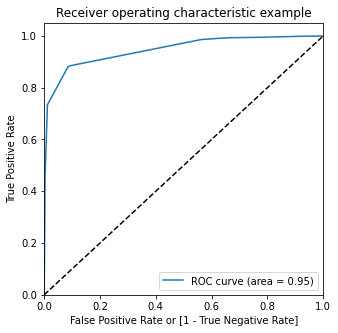

In [327]:
# Plotting the ROC curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Plot shows AOC value of 0.95 which is very optimal value for us

# 12. Finding the Optimal cutoff Point

In [328]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.537743          1    1    1    1    1    1    1    0   
1          0        0.119976          0    1    1    0    0    0    0    0   
2          0        0.040476          0    1    0    0    0    0    0    0   
3          1        0.947103          1    1    1    1    1    1    1    1   
4          0        0.119976          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    1  
4    0    0    0

In [329]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.645951  0.985945  0.437895
0.2   0.2  0.901915  0.880943  0.914748
0.3   0.3  0.901915  0.880943  0.914748
0.4   0.4  0.901915  0.880943  0.914748
0.5   0.5  0.901915  0.880943  0.914748
0.6   0.6  0.891871  0.734601  0.988110
0.7   0.7  0.891871  0.734601  0.988110
0.8   0.8  0.891243  0.732534  0.988363
0.9   0.9  0.891243  0.732534  0.988363


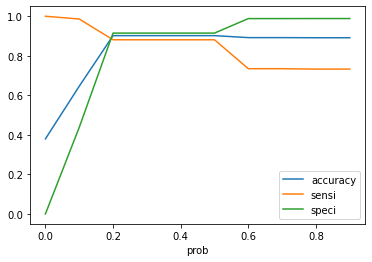

In [330]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### The plot shows that the optimal value of 0.2 can be taken as cutoff probability

In [331]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.537743          1    1    1    1    1    1    1    0   
1          0        0.119976          0    1    1    0    0    0    0    0   
2          0        0.040476          0    1    0    0    0    0    0    0   
3          1        0.947103          1    1    1    1    1    1    1    1   
4          0        0.119976          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    1    1    1                1  
4    0    0    0                0

In [332]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9019146264908977

In [333]:
#Creating a confusion matrix with the new threshold

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3616,  337],
       [ 288, 2131]], dtype=int64)

In [334]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [335]:
# Printing the confusion matrix

print("True Positives :",TP)
print("True Negatives :",TN)
print("False Positives :",FP)
print("False Negatives :",FN)

True Positives : 2131
True Negatives : 3616
False Positives : 337
False Negatives : 288


In [336]:
# sensitivity of our logistic regression model

TP / float(TP+FN)

0.8809425382389418

In [337]:
# specificity

TN / float(TN+FP)

0.9147482924361244

In [338]:
# Calculate false postive rate - predicting converted when customer does not have converted

print(FP/ float(TN+FP))

0.08525170756387554


In [339]:
# Positive predictive value 

print (TP / float(TP+FP))

0.8634521880064829


In [340]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9262295081967213


## Checking Precission and Recall

In [341]:
from sklearn.metrics import precision_score, recall_score

In [342]:
# Precision score on train data
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8634521880064829

In [343]:
# Checking Recall Score on train data
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8809425382389418

#### Scores show we have Precission of 92% and Recall of 86% for the Train data

In [344]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

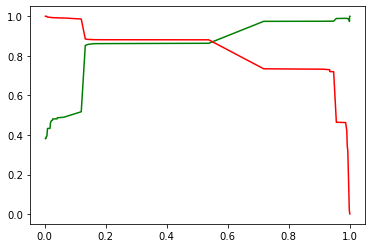

In [345]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 13. Making Predictions on the Test Set

Transforming the test data

In [346]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [347]:
X_test = X_test[col]

X_test=X_test.drop(['Tags_number not provided'],1)
X_test=X_test.drop(['Tags_wrong number given'],1)
                   
X_test.head()

Lead Source_Welingak Website  Last Activity_SMS Sent  \
3504                             0                       0   
4050                             0                       1   
7201                             0                       1   
1196                             0                       0   
8219                             0                       0   

      Tags_Closed by Horizzon  Tags_Diploma holder (Not Eligible)  \
3504                        0                                   0   
4050                        0                                   0   
7201                        0                                   0   
1196                        0                                   0   
8219                        0                                   0   

      Tags_Interested  in full time MBA  Tags_Interested in other courses  \
3504                                  0                                 0   
4050                                  0                                 0   
7201                                  0                                 0   
1196                                  0                                 0   
8219                                  0                                 0   

      Tags_Lost to EINS  Tags_Not doing further education  Tags_Ringing  \
3504                  0                                 0             1   
4050                  0                                 0             0   
7201                  0                                 0             0   
1196                  0                                 0             1   
8219                  1                                 0             0   

      Tags_Will revert after reading the email  Tags_invalid number  \
3504                                         0                    0   
4050                                         1                    0   
7201                                         0                    0   
1196                                         0                    0   
8219                                         0                    0   

      Tags_switched off  Asymmetrique Activity Index_03.Low  
3504                  0                                   0  
4050                  0                                   0  
7201                  0                                   0  
1196                  0                                   0  
8219                  0                                   0

In [348]:
X_test_sm = sm.add_constant(X_test)

In [349]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.007704
4050    0.993497
7201    0.537743
1196    0.007704
8219    0.986449
8747    0.119976
9048    0.119976
6524    0.025726
7693    0.537743
8187    0.062128
dtype: float64

In [350]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [351]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [352]:
# Removing index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [353]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [354]:
y_pred_final.head()

Converted         0
0          0  0.007704
1          1  0.993497
2          0  0.537743
3          0  0.007704
4          1  0.986449

In [355]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [356]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Converted_Prob
0          0        0.007704
1          1        0.993497
2          0        0.537743
3          0        0.007704
4          1        0.986449

In [357]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.2 else 0)

y_pred_final.head()

Converted  Converted_Prob  final_predicted
0          0        0.007704                0
1          1        0.993497                1
2          0        0.537743                1
3          0        0.007704                0
4          1        0.986449                1

# 14. Model Evaluation

In [358]:
# overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9029659465397291

In [359]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1547,  142],
       [ 123,  919]], dtype=int64)

In [360]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [361]:
# Printing the confusion matrix

print("True Positives :",TP)
print("True Negatives :",TN)
print("False Positives :",FP)
print("False Negatives :",FN)

True Positives : 919
True Negatives : 1547
False Positives : 142
False Negatives : 123


In [362]:
# sensitivity of our logistic regression model

TP / float(TP+FN)*100

88.1957773512476

In [363]:
# specificity

TN / float(TN+FP)*100

91.59265837773832

In [364]:
#Checking precision score on test data

precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8661639962299718

In [365]:
#Checking recall score on test data

recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8819577735124761

#### Scores show we got a precision of 93% and a recall rate of 87% on the test data

#### This value is almost identical to the values we got on the train data (92% precission and 86% recall).

#### So, we can conclude to recommend this model for making good predictions  